# Proyek Deteksi Diabetes Menggunakan Dataset Pima Indians Diabetes


- Nama    : Rizaki Akbar
- email   : rizakiakbar004@gmail.com
- Username: rizaki_akbar_r0wz

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_curve, f1_score
from imblearn.over_sampling import SMOTE

#  Data Understanding & EDA

In [2]:
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/zaki903/submission-deteksi-diabetes/refs/heads/main/data/diabetes.csv')

# Melihat 5 baris pertama data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Cek Jumlah baris dan kolom
print("Ukuran data:", df.shape)

Ukuran data: (768, 9)


ukuran data terdiri dari 768 baris dan 9 kolom.

In [4]:
# Cek nama kolom dan tipe data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


terdapat 9 fitur yang ada pada data diabetes, diantaranya adalah bertipe data int64 dan 2 fitur bertipe data float64 dan setiap fitur memiliki data sebanyak 768 data

In [5]:
# Statistik deskriptif dasar
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

pada fitur Skiinthicness BloodPressure, Glucose, BMI, dan Insulin memiliki nilai 0 sehingga ini tidak wajar secara medis karena secara medis nilai ini tidak boleh 0

In [6]:
# Cek Kolom medis yang tidak mungkin bernilai 0
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Cek berapa banyak nilai 0 di tiap kolom medis
for col in cols_with_zero:
    print(f"{col} memiliki {df[df[col] == 0].shape[0]} nilai 0")


Glucose memiliki 5 nilai 0
BloodPressure memiliki 35 nilai 0
SkinThickness memiliki 227 nilai 0
Insulin memiliki 374 nilai 0
BMI memiliki 11 nilai 0


ternyata banyak kesalahan nilai nol yang terjadi pada data.

# Visualisasi Data

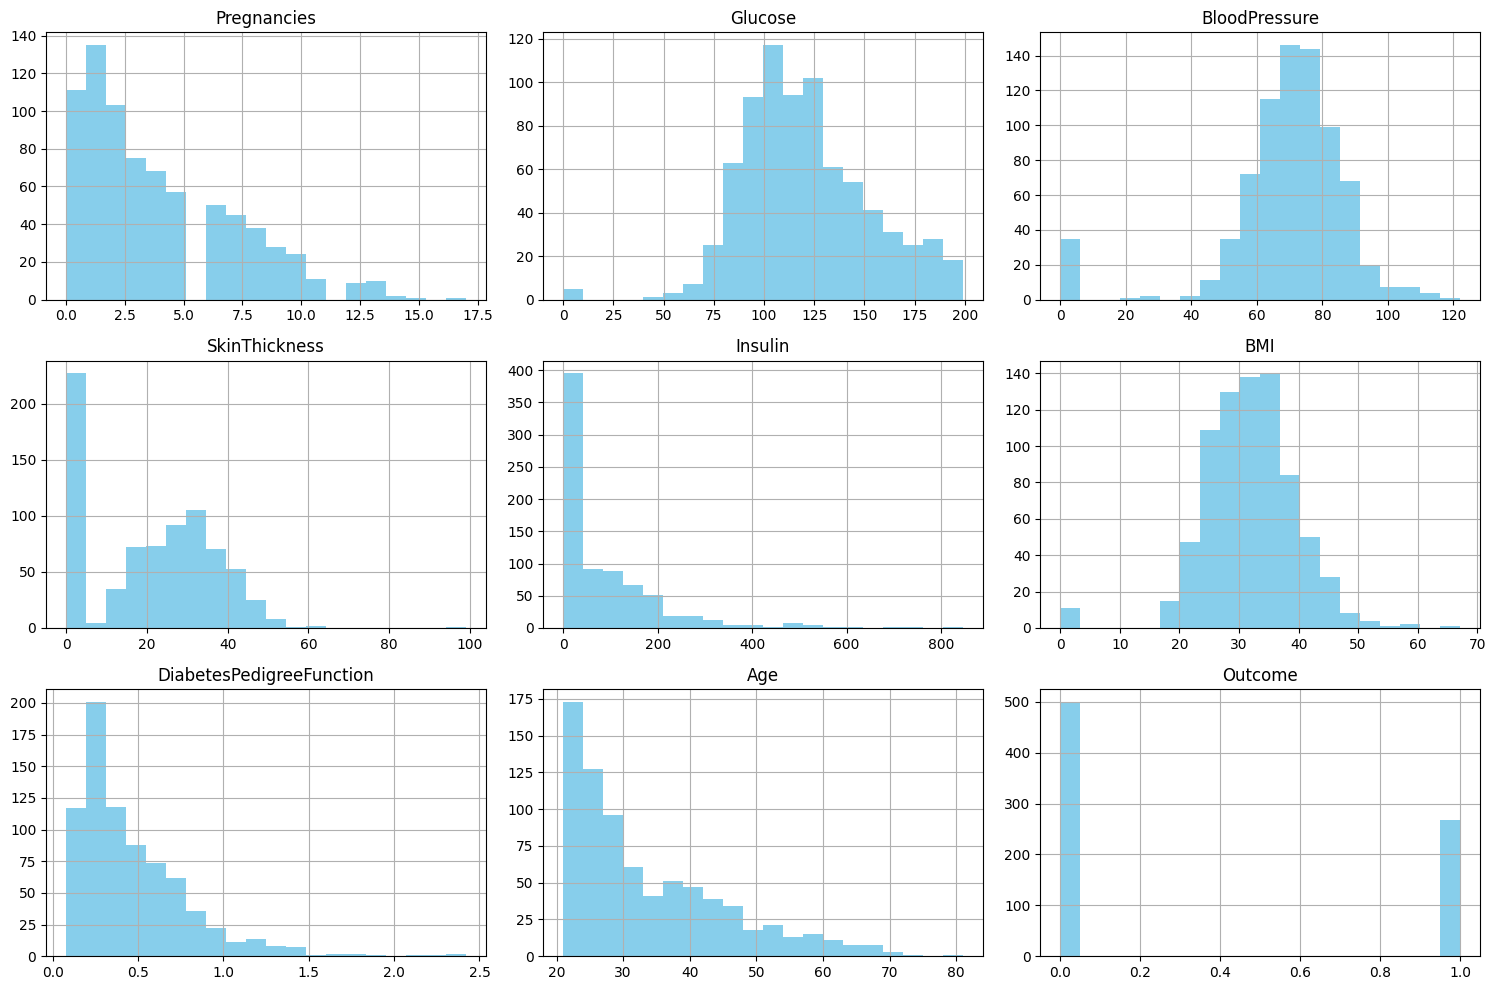

In [7]:
# Histplot dari semua fitur
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()


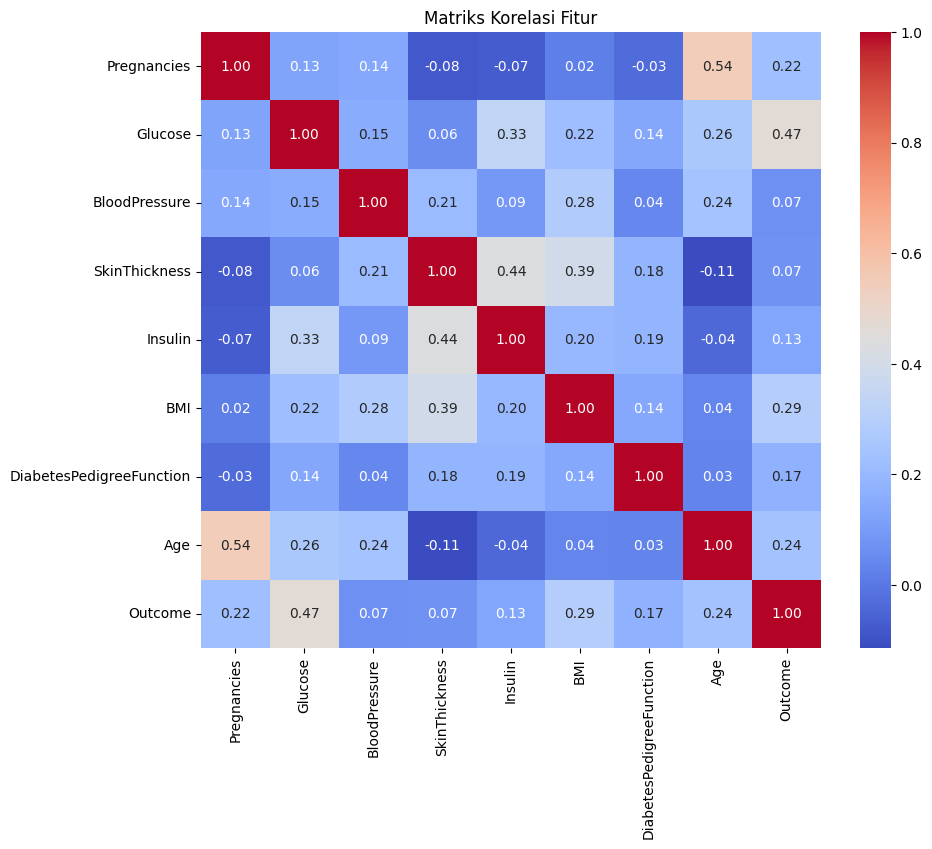

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()


In [9]:
# deteksi outlier dengan IQR untuk Glucose
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Glucose'] < Q1 - 1.5*IQR) | (df['Glucose'] > Q3 + 1.5*IQR)]
print("Jumlah outlier di Glucose:", outliers.shape[0])


Jumlah outlier di Glucose: 5


#Data Preprocessing (Persiapan Data)


In [10]:
# Salin DataFrame agar tidak merusak data asli
data = df.copy()

# Kolom yang tidak boleh memiliki 0
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti 0 dengan NaN
for col in invalid_cols:
    data[col] = data[col].replace(0, np.nan)

# Cek berapa banyak missing
print(data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


pertama kita disini mengganti nilai 0 ke nilai NaN

In [11]:
# Imputasi dengan median (lebih stabil terhadap outlier)
for col in invalid_cols:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)


lalu kita ganti nilai missing tadi(NaN) dengan nilai yang sering muncul atau median karena dengan nilai ini dia akan tahan terhadap outlier

In [12]:
# Feature Scaling / Normalisasi
X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


menggunakan StandardScaler untuk memastikan semua fitur berada pada skala yang sama, terutama penting untuk algoritma seperti KNN, SVM, dan Neural Network.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Memisahkan data menjadi data pelatihan dan data pengujian.

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi kelas sebelum SMOTE:", y_train.value_counts())
print("Distribusi kelas setelah SMOTE:", y_train_resampled.value_counts())


Distribusi kelas sebelum SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
Distribusi kelas setelah SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


menggunakan SMOTE agar model tidak model tidak bias terhadap kelas mayoritas.

In [15]:
# Buat kembali DataFrame dari hasil scaling
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Statistik deskriptif setelah scaling
print(scaled_df.describe())


        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean   2.613650e-16              2.451743e-16  1.931325e-16  
std    1.000652e+00              1.000652e+00  1.000652e+00  
min   -2.074783e+00   

In [16]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X_train_resampled, y_train_resampled)

selected_features = X.columns[fit.support_]
print("Fitur yang dipilih:", selected_features)


Fitur yang dipilih: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')


Menggunakan fetaru selection agar akurasinya lebih maksimal

# Model Training dan Evaluasi Awal

In [17]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    return acc

In [18]:
lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr.fit(X_train_resampled, y_train_resampled)
print("\n--- Logistic Regression ---")
evaluate_model(lr, X_test, y_test)


--- Logistic Regression ---
Confusion Matrix:
[[74 26]
 [17 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

Accuracy: 0.7208


0.7207792207792207

In [19]:
rf = RandomForestClassifier(
    n_estimators=180,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True, 
    random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)
print("\n--- Random Forest ---")
evaluate_model(rf, X_test, y_test)



--- Random Forest ---
Confusion Matrix:
[[76 24]
 [16 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Accuracy: 0.7403


0.7402597402597403

In [20]:
svm = SVC(
    probability=True,
    random_state=42
)

svm.fit(X_train_resampled, y_train_resampled)
print("\n--- Support Vector Machine ---")
evaluate_model(svm, X_test, y_test)


--- Support Vector Machine ---
Confusion Matrix:
[[75 25]
 [17 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.60      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

Accuracy: 0.7273


0.7272727272727273

In [21]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski'
)

knn.fit(X_train_resampled, y_train_resampled)
print("\n--- K-Nearest Neighbors ---")
evaluate_model(knn, X_test, y_test)


--- K-Nearest Neighbors ---
Confusion Matrix:
[[68 32]
 [15 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       100
           1       0.55      0.72      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

Accuracy: 0.6948


0.6948051948051948

### Evaluate Model

| Model                  | Accuracy   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
| ---------------------- | ---------- | ------------------- | ---------------- | ------------------ |
| Logistic Regression    | 72.08%     | 0.59                | 0.69             | 0.63               |
| Random Forest          | **75.32%** | **0.64**            | **0.67**         | **0.65**           |
| Support Vector Machine | 72.73%     | 0.60                | 0.69             | 0.64               |
| K-Nearest Neighbors    | 69.48%     | 0.55                | **0.72**         | 0.62               |


### Inter Pretasi Hasil
1. Random Forest Menjadi Model Terbaik Sementara
- Akurasi tertinggi (75.32%)
- Precision dan F1-score untuk penderita diabetes (Outcome = 1) juga tertinggi
- Hasil ini menunjukkan keseimbangan prediksi untuk kedua kelas dan potensi terbaik sebagai baseline model

2. Logistic Regression dan SVM Stabil, Tapi Kurang dalam Precision
- Recall tinggi (baik untuk mendeteksi penderita), tapi precision rendah, lebih banyak false positives.

3. K-Nearest Neighbors Paling Lemah
- Walau recall tinggi (0.72), precision-nya paling rendah (0.55) → model sering salah deteksi orang sehat sebagai sakit.
- Performa keseluruhan (F1 dan akurasi) juga paling rendah.

### Kesimpulan
kita akan memilihih random forest untuk model utama kita dan kita akan melukukan hyper parameter tuning agar meningkatkan performa model.

# Hyper Paramter Tuning

Percobaan pertama tuning menggunakan random forest tuning menggunakan grid paramenter

In [22]:
# Random Forest tuning
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],       # jumlah pohon
    'max_depth': [None, 10, 20, 30],       # kedalaman pohon
    'min_samples_split': [2, 5, 10],       # minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],         # minimum sampel pada daun
    'bootstrap': [True, False]              # sampling bootstrap atau tidak
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_rf.fit(X_train_resampled, y_train_resampled)

print("Best RF params:", grid_rf.best_params_)
print("Best RF F1 score:", grid_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RF params: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF F1 score: 0.844539279560545


In [23]:
best_rf = grid_rf.best_estimator_
print("\nEvaluasi Random Forest terbaik:")
evaluate_model(best_rf, X_test, y_test)


Evaluasi Random Forest terbaik:
Confusion Matrix:
[[77 23]
 [15 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy: 0.7532


0.7532467532467533

#### Hyperparameter Tuning dengan RandomizedSearchCV

In [24]:
rf = RandomForestClassifier(random_state=42)

# Definisikan distribusi hyperparameter
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,              # jumlah kombinasi yang dicoba
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best RF params:", random_search_rf.best_params_)
print("Best RF F1 score:", random_search_rf.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 180}
Best RF F1 score: 0.8429471481479494


In [25]:
best_rf = random_search_rf.best_estimator_
print("\nEvaluasi Random Forest terbaik:")
evaluate_model(best_rf, X_test, y_test)


Evaluasi Random Forest terbaik:
Confusion Matrix:
[[76 24]
 [16 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Accuracy: 0.7403


0.7402597402597403

### Threshold Tuning

In [26]:
# Dapatkan probabilitas prediksi kelas positif (diabetes)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Cek berbagai threshold untuk menemukan yang optimal berdasarkan f1-score
thresholds = np.arange(0, 1, 0.01)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best threshold based on F1 score: {best_thresh:.2f}")

# Prediksi ulang dengan threshold terbaik
y_pred_best_thresh = (y_proba >= best_thresh).astype(int)

# Evaluasi ulang
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix with tuned threshold:")
print(confusion_matrix(y_test, y_pred_best_thresh))
print("\nClassification Report with tuned threshold:")
print(classification_report(y_test, y_pred_best_thresh))


Best threshold based on F1 score: 0.24
Confusion Matrix with tuned threshold:
[[61 39]
 [ 4 50]]

Classification Report with tuned threshold:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       100
           1       0.56      0.93      0.70        54

    accuracy                           0.72       154
   macro avg       0.75      0.77      0.72       154
weighted avg       0.81      0.72      0.73       154



### Voting Classifier

In [27]:
# Inisialisasi model, pakai parameter terbaik dari tuning sebelumnya jika ada
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svm_clf = SVC(probability=True, random_state=42)
rf_clf = best_rf  # model Random Forest hasil tuning

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm_clf), ('rf', rf_clf)],
    voting='soft'  # voting berdasarkan probabilitas
)

# Latih ensemble di data train (yang sudah di-resample)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluasi di test set
y_pred_vote = voting_clf.predict(X_test)

print("Confusion Matrix Voting Classifier:")
print(confusion_matrix(y_test, y_pred_vote))
print("\nClassification Report Voting Classifier:")
print(classification_report(y_test, y_pred_vote))


Confusion Matrix Voting Classifier:
[[77 23]
 [14 40]]

Classification Report Voting Classifier:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



### Visualisasi Hasil

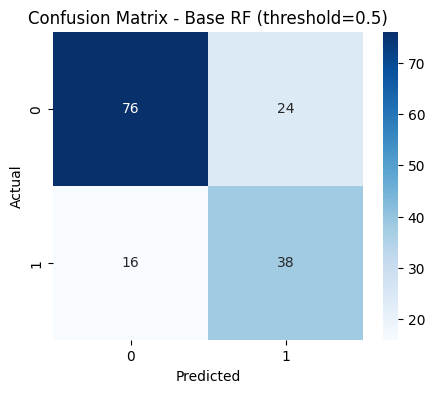

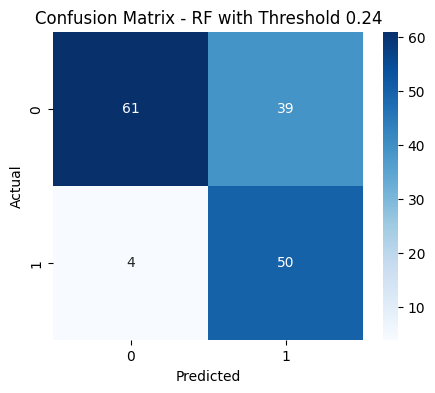

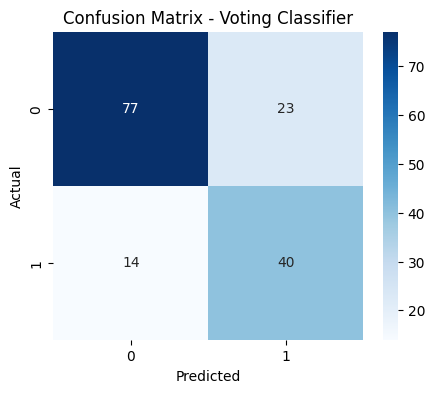

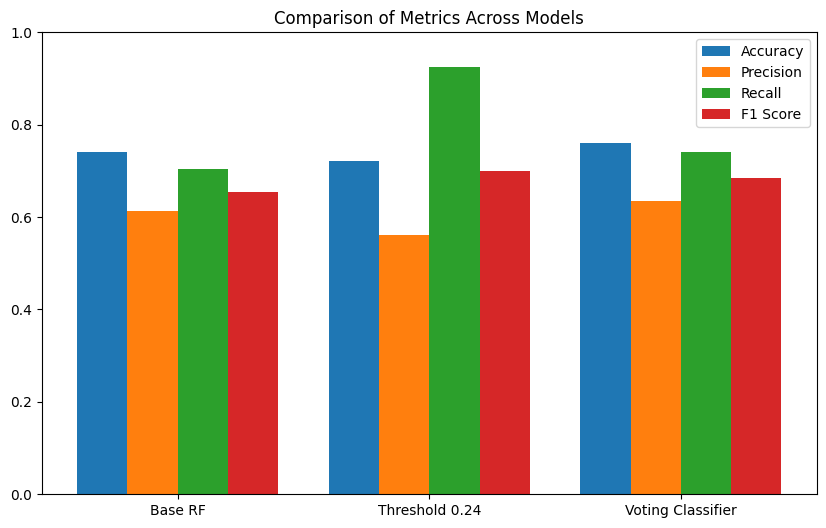

In [28]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

# 1. Prediksi awal (threshold 0.5)
y_pred_base = best_rf.predict(X_test)
metrics_base = get_metrics(y_test, y_pred_base)
cm_base = confusion_matrix(y_test, y_pred_base)

# 2. Prediksi threshold tuning
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= best_thresh).astype(int)
metrics_thresh = get_metrics(y_test, y_pred_thresh)
cm_thresh = confusion_matrix(y_test, y_pred_thresh)

# 3. Prediksi voting classifier
y_pred_vote = voting_clf.predict(X_test)
metrics_vote = get_metrics(y_test, y_pred_vote)
cm_vote = confusion_matrix(y_test, y_pred_vote)

# Plot confusion matrix
plot_confusion_matrix(cm_base, 'Confusion Matrix - Base RF (threshold=0.5)')
plot_confusion_matrix(cm_thresh, f'Confusion Matrix - RF with Threshold {best_thresh:.2f}')
plot_confusion_matrix(cm_vote, 'Confusion Matrix - Voting Classifier')

# Plot perbandingan metrik
labels = ['Base RF', f'Threshold {best_thresh:.2f}', 'Voting Classifier']
accuracy_vals = [metrics_base['accuracy'], metrics_thresh['accuracy'], metrics_vote['accuracy']]
precision_vals = [metrics_base['precision'], metrics_thresh['precision'], metrics_vote['precision']]
recall_vals = [metrics_base['recall'], metrics_thresh['recall'], metrics_vote['recall']]
f1_vals = [metrics_base['f1'], metrics_thresh['f1'], metrics_vote['f1']]

x = range(len(labels))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar([p - width*1.5 for p in x], accuracy_vals, width=width, label='Accuracy')
plt.bar([p - width*0.5 for p in x], precision_vals, width=width, label='Precision')
plt.bar([p + width*0.5 for p in x], recall_vals, width=width, label='Recall')
plt.bar([p + width*1.5 for p in x], f1_vals, width=width, label='F1 Score')

plt.xticks(x, labels)
plt.ylim(0,1)
plt.title('Comparison of Metrics Across Models')
plt.legend()
plt.show()
